In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

'2.13.0'

In [ ]:
import tensorflow as tf
print("tensorflow version :{}".format(tf.__version__))
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

tensorflow version :2.13.0
Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1952837368882223076
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14357954560
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4788364969474018389
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import class_weight

In [ ]:
from keras.layers import Conv1D, Dense, Dropout, GlobalMaxPool1D
from keras.layers import TimeDistributed, LSTM, Bidirectional
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import plot_model, to_categorical
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
data_path = '/content/drive/MyDrive/CAV/data/Instant attack/10000/'

In [ ]:
sensor1_data = pd.read_csv(data_path + "Sensor1_values_instant_10000.csv", index_col= 'Unnamed: 0')
sensor1_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor1_label = pd.read_csv(data_path+"Ground_truth_instant_10000_sensor1.csv", names=['Class'])
sensor1_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
sensor2_data = pd.read_csv(data_path + "Sensor2_values_instant_10000.csv", index_col = "Unnamed: 0")
sensor2_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor2_label = pd.read_csv(data_path + "Ground_truth_instant_10000_sensor2.csv",names=['Class'])
sensor2_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
sensor3_data = pd.read_csv(data_path + "Sensor3_values_instant_10000.csv", index_col = "Unnamed: 0")
sensor3_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor3_label = pd.read_csv(data_path + "Ground_truth_instant_10000_sensor3.csv", names=['Class'])
sensor3_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
sensor1_data['std_speed_5'] = sensor1_data['InVehicle_Longitudinal_Speed'].rolling(5, min_periods= 1, center= True).std()
sensor1_data['std_acc_5'] = sensor1_data['InVehicle_Longitudinal_Accel'].rolling(5, min_periods= 1, center= True).std()
sensor1_data['std_GPS_5'] = sensor1_data['GPS_Speed'].rolling(5, min_periods= 1, center= True).std()

In [ ]:
sensor1_data.columns

Index(['InVehicle_Longitudinal_Speed', 'GPS_Speed',
       'InVehicle_Longitudinal_Accel', 'std_speed_5', 'std_acc_5',
       'std_GPS_5'],
      dtype='object')

<Axes: >

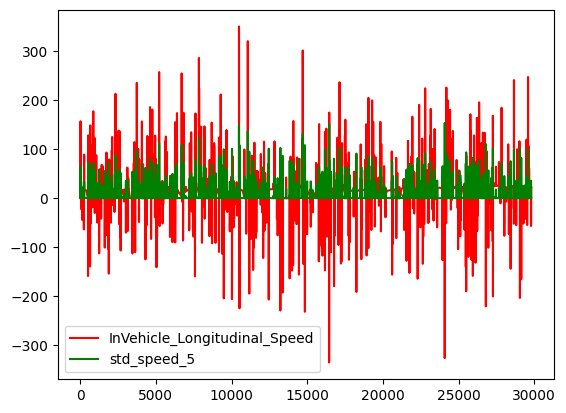

In [ ]:
sensor1_data[['InVehicle_Longitudinal_Speed','std_speed_5']].plot(color=['red', 'green'] )

<Axes: >

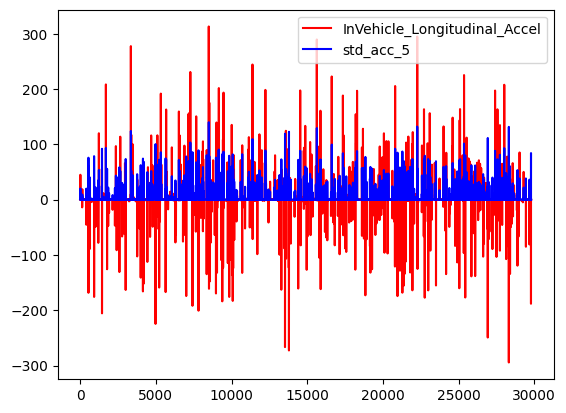

In [ ]:
sensor1_data[['InVehicle_Longitudinal_Accel','std_acc_5']].plot(color=['red', 'blue'] )

<Axes: >

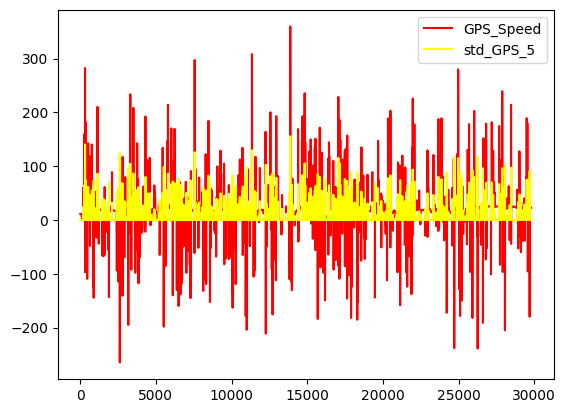

In [ ]:
sensor1_data[['GPS_Speed','std_GPS_5']].plot(color=['red', 'yellow'] )

In [ ]:
sensor2_data['std_speed_5'] = sensor2_data['InVehicle_Longitudinal_Speed'].rolling(5, min_periods= 1, center= True).std()
sensor2_data['std_acc_5'] = sensor2_data['InVehicle_Longitudinal_Accel'].rolling(5, min_periods= 1, center= True).std()
sensor2_data['std_GPS_5'] = sensor2_data['GPS_Speed'].rolling(5, min_periods= 1, center= True).std()

In [ ]:
sensor2_data.columns

Index(['InVehicle_Longitudinal_Speed', 'GPS_Speed',
       'InVehicle_Longitudinal_Accel', 'std_speed_5', 'std_acc_5',
       'std_GPS_5'],
      dtype='object')

<Axes: >

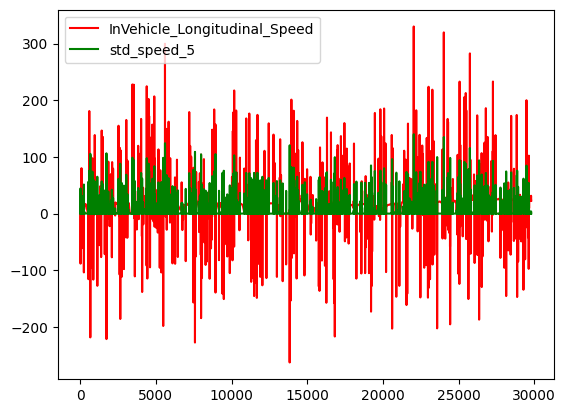

In [ ]:
sensor2_data[['InVehicle_Longitudinal_Speed','std_speed_5']].plot(color=['red', 'green'] )

<Axes: >

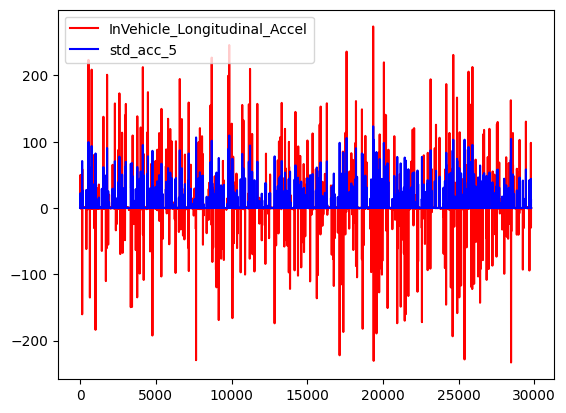

In [ ]:
sensor2_data[['InVehicle_Longitudinal_Accel','std_acc_5']].plot(color=['red', 'blue'] )

<Axes: >

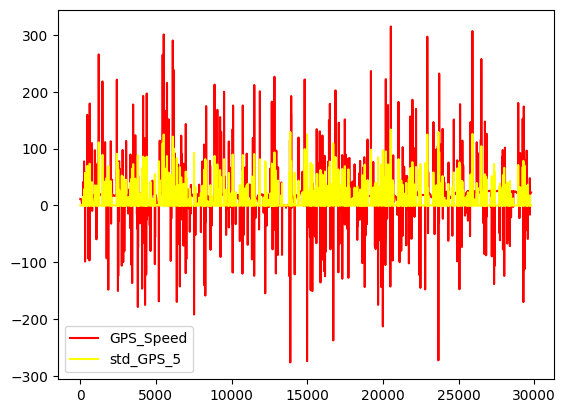

In [ ]:
sensor2_data[['GPS_Speed','std_GPS_5']].plot(color=['red', 'yellow'] )

In [ ]:
sensor3_data['std_speed_5'] = sensor3_data['InVehicle_Longitudinal_Speed'].rolling(5, min_periods= 1, center= True).std()
sensor3_data['std_acc_5'] = sensor3_data['InVehicle_Longitudinal_Accel'].rolling(5, min_periods= 1, center= True).std()
sensor3_data['std_GPS_5'] = sensor3_data['GPS_Speed'].rolling(5, min_periods= 1, center= True).std()

In [ ]:
sensor3_data.columns

Index(['InVehicle_Longitudinal_Speed', 'GPS_Speed',
       'InVehicle_Longitudinal_Accel', 'std_speed_5', 'std_acc_5',
       'std_GPS_5'],
      dtype='object')

<Axes: >

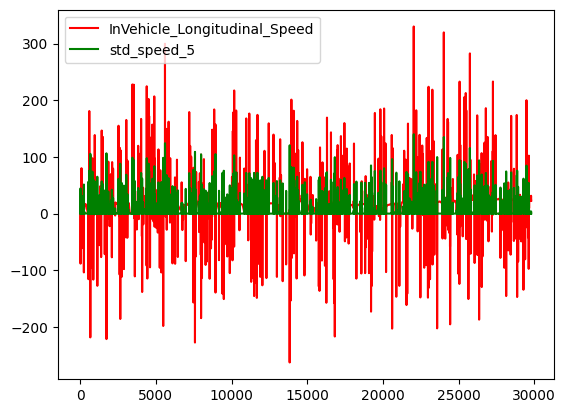

In [ ]:
sensor3_data[['InVehicle_Longitudinal_Speed','std_speed_5']].plot(color=['red', 'green'] )

<Axes: >

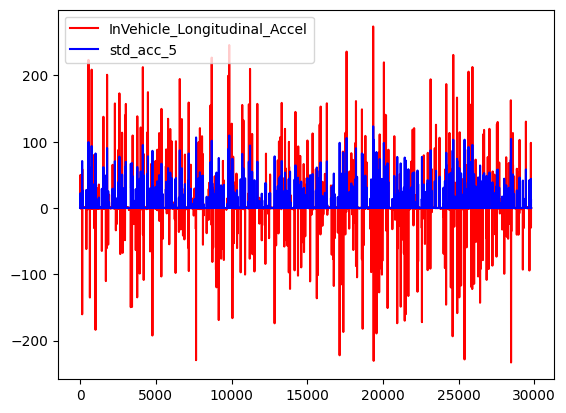

In [ ]:
sensor3_data[['InVehicle_Longitudinal_Accel','std_acc_5']].plot(color=['red', 'blue'] )

<Axes: >

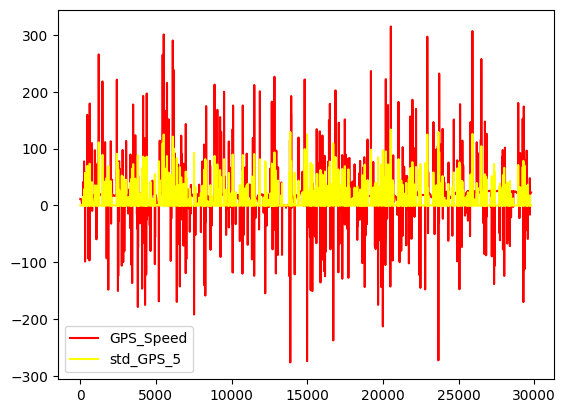

In [ ]:
sensor3_data[['GPS_Speed','std_GPS_5']].plot(color=['red', 'yellow'] )

In [ ]:
scaler  = StandardScaler()
scaler.fit(sensor1_data[['std_speed_5','std_GPS_5','std_acc_5']])
sensor1_data_normal = scaler.transform(sensor1_data[['std_speed_5','std_GPS_5','std_acc_5']])
sensor1_data_normal[:5]

array([[-0.2440782 , -0.23361998, -0.22547835],
       [-0.24403196, -0.23405918, -0.22619107],
       [-0.24401255, -0.23433561, -0.22693428],
       [-0.24422462, -0.23548257, -0.22646754],
       [-0.24429053, -0.23545152, -0.23567571]])

In [ ]:
scaler  = StandardScaler()
scaler.fit(sensor2_data[['std_speed_5','std_GPS_5','std_acc_5']])
sensor2_data_normal = scaler.transform(sensor2_data[['std_speed_5','std_GPS_5','std_acc_5']])
sensor2_data_normal[:5]

array([[-0.24703   , -0.23421966, -0.22739145],
       [-0.24698337, -0.23466353, -0.22814342],
       [-0.2469638 , -0.2349429 , -0.22892756],
       [-0.24717764, -0.23610206, -0.22843511],
       [-0.24724409, -0.23607069, -0.23815034]])

In [ ]:
scaler  = StandardScaler()
scaler.fit(sensor3_data[['std_speed_5','std_GPS_5','std_acc_5']])
sensor3_data_normal = scaler.transform(sensor3_data[['std_speed_5','std_GPS_5','std_acc_5']])
sensor3_data_normal[:5]

array([[-0.24703   , -0.23421966, -0.22739145],
       [-0.24698337, -0.23466353, -0.22814342],
       [-0.2469638 , -0.2349429 , -0.22892756],
       [-0.24717764, -0.23610206, -0.22843511],
       [-0.24724409, -0.23607069, -0.23815034]])

In [ ]:
window_size = 10

# create windows with overlap
def convertToFrames(X_data,y_data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []

    for i in range(len(X_data)-step):
        y_or = 0
        d=i+step
        X.append(X_data[i:d,])
        for y in y_data.iloc[i:d].values:
           y_or = y_or or y

        Y.append(y_or)
    return np.array(X), np.array(Y)

In [ ]:
X_sensor1, y_sensor1 = convertToFrames(sensor1_data_normal, sensor1_label, window_size)
X_sensor1.shape, y_sensor1.shape

((29790, 10, 3), (29790, 1))

In [ ]:
X_sensor2, y_sensor2 = convertToFrames(sensor2_data_normal, sensor2_label, window_size)
X_sensor2.shape, y_sensor2.shape

((29790, 10, 3), (29790, 1))

In [ ]:
X_sensor3, y_sensor3 = convertToFrames(sensor3_data_normal, sensor3_label, window_size)
X_sensor3.shape, y_sensor3.shape

((29790, 10, 3), (29790, 1))

In [ ]:
y_sensor1 = to_categorical(y_sensor1, num_classes= 2, dtype='float32')
y_sensor2 = to_categorical(y_sensor2, num_classes= 2, dtype='float32')
y_sensor3 = to_categorical(y_sensor3, num_classes= 2, dtype='float32')
y_sensor1.shape, y_sensor2.shape, y_sensor3.shape

((29790, 2), (29790, 2), (29790, 2))

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 10
tscv = TimeSeriesSplit(n_splits=n_splits)
for train_index, test_index in tscv.split(X_sensor1):
    # Split the data based on the indices
    X_train_sensor1, X_test_sensor1 = X_sensor1[train_index], X_sensor1[test_index]
    y_train_sensor1, y_test_sensor1 = y_sensor1[train_index], y_sensor1[test_index]

for train_index, test_index in tscv.split(X_sensor2):
    # Split the data based on the indices
    X_train_sensor2, X_test_sensor2 = X_sensor2[train_index], X_sensor2[test_index]
    y_train_sensor2, y_test_sensor2 = y_sensor2[train_index], y_sensor2[test_index]

for train_index, test_index in tscv.split(X_sensor3):
    # Split the data based on the indices
    X_train_sensor3, X_test_sensor3 = X_sensor3[train_index], X_sensor3[test_index]
    y_train_sensor3, y_test_sensor3 = y_sensor3[train_index], y_sensor3[test_index]

In [ ]:
X_train_sensor1.shape, X_test_sensor1.shape,y_train_sensor1.shape, y_test_sensor1.shape

((27082, 10, 3), (2708, 10, 3), (27082, 2), (2708, 2))

In [ ]:
X_train_sensor1 = np.reshape(X_train_sensor1, (X_train_sensor1.shape[0],  X_train_sensor1.shape[1],X_train_sensor1.shape[2], 1))
X_test_sensor1 = np.reshape(X_test_sensor1, (X_test_sensor1.shape[0],X_test_sensor1.shape[1],X_test_sensor1.shape[2], 1))

In [ ]:
X_train_sensor1.shape, X_test_sensor1.shape,y_train_sensor1.shape, y_test_sensor1.shape

((27082, 10, 3, 1), (2708, 10, 3, 1), (27082, 2), (2708, 2))

In [ ]:
X_train_sensor2 = np.reshape(X_train_sensor2, (X_train_sensor2.shape[0],  X_train_sensor2.shape[1],X_train_sensor2.shape[2], 1))
X_test_sensor2 = np.reshape(X_test_sensor2, (X_test_sensor2.shape[0],X_test_sensor2.shape[1],X_test_sensor2.shape[2], 1))

In [ ]:
X_train_sensor3 = np.reshape(X_train_sensor3, (X_train_sensor3.shape[0],  X_train_sensor3.shape[1],X_train_sensor3.shape[2], 1))
X_test_sensor3 = np.reshape(X_test_sensor3, (X_test_sensor3.shape[0],X_test_sensor3.shape[1],X_test_sensor3.shape[2], 1))

In [ ]:
def creatModel():
  model = Sequential()
  ## CNN
  model.add(TimeDistributed( Conv1D(kernel_size=3, filters= 40, activation= 'relu', padding='same',
                   input_shape=(X_train_sensor1.shape[0], X_train_sensor1.shape[1],))))
  model.add(TimeDistributed(Dropout(0.2)))
  model.add(TimeDistributed( Conv1D(kernel_size=3, filters= 60, activation= 'relu', padding='same')))
  model.add(TimeDistributed(Dropout(0.2)))
  #model.add(TimeDistributed(Conv1D(kernel_size=3, filters= 60, activation= 'relu', padding='same')))
  # model.add(MaxPooling1D((2,)))
  model.add(TimeDistributed(GlobalMaxPool1D()))
  model.add(TimeDistributed(Dropout(0.2)))
  ##BiLSTM
  model.add(Bidirectional(LSTM(60)))
  model.add(Dense(units= 30))
  model.add(Dropout(0.2))

  model.add(Dense(2, activation='sigmoid'))#, kernel_regularizer=l2()

  model.compile(optimizer = Adam(), loss= 'binary_crossentropy',  metrics=['accuracy'])
  return model

In [ ]:
model_path = '/content/drive/MyDrive/CAV/data/Instant attack/10000/Models/Models26-1-KF-CNN-40-60-LSTM-60/'

class Model_save(Callback):
  def on_epoch_end(self, epoch, logs={}):
    self.model.save(model_path + "CNN-BiLSTM-Instant-10000-CAV-perEpoch_{}.h5".format(sensor))


In [ ]:
def setCallbacks(sensor):

  best_model_path = model_path + 'Best_CNN-BiLSTM-Instant-10000-CAV_{}.h5'.format(sensor)
  checkpoint = ModelCheckpoint(best_model_path, monitor='val_loss', save_best_only=True, mode='min')

  history_cb = tf.keras.callbacks.CSVLogger(model_path + 'historyLOG_Instant-10000_{}.csv'.format(sensor), separator=",", append=True)

  model_save = Model_save()

  Estop = EarlyStopping(monitor='val_accuracy', patience= 200)

  return model_save, checkpoint, history_cb, Estop

In [ ]:
import time

class TimeHistory(Callback):

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        epoch_time = time.time() - self.epoch_time_start
        logs['epoch_time'] = epoch_time

In [ ]:
sensor = "sensor1"
time_callback = TimeHistory()
model_sensor1 = creatModel()
model_save, checkpoint, history_cb, Estop = setCallbacks("sensor1")
history_sensor1 = model_sensor1.fit(X_train_sensor1, y_train_sensor1,
                                    batch_size = 128, epochs = 500,
                                    validation_split = 0.1,
                                    verbose = 1,
                                    callbacks = [time_callback, model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)

Epoch 1/500
191/191 [==============================] - 27s 15ms/step - loss: 0.1497 - accuracy: 0.9498 - val_loss: 0.0429 - val_accuracy: 0.9845 - epoch_time: 26.6257
Epoch 2/500
  1/191 [..............................] - ETA: 2s - loss: 0.0720 - accuracy: 0.9844

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


191/191 [==============================] - 3s 13ms/step - loss: 0.0585 - accuracy: 0.9849 - val_loss: 0.0268 - val_accuracy: 0.9934 - epoch_time: 2.4078
Epoch 3/500
191/191 [==============================] - 2s 11ms/step - loss: 0.0439 - accuracy: 0.9905 - val_loss: 0.0303 - val_accuracy: 0.9908 - epoch_time: 1.9826
Epoch 4/500
191/191 [==============================] - 2s 9ms/step - loss: 0.0368 - accuracy: 0.9924 - val_loss: 0.0162 - val_accuracy: 0.9948 - epoch_time: 1.6121
Epoch 5/500
191/191 [==============================] - 2s 9ms/step - loss: 0.0336 - accuracy: 0.9931 - val_loss: 0.0140 - val_accuracy: 0.9948 - epoch_time: 1.6257
Epoch 6/500
191/191 [==============================] - 2s 10ms/step - loss: 0.0310 - accuracy: 0.9938 - val_loss: 0.0113 - val_accuracy: 0.9952 - epoch_time: 1.7328
Epoch 7/500
191/191 [==============================] - 2s 9ms/step - loss: 0.0287 - accuracy: 0.9944 - val_loss: 0.0110 - val_accuracy: 0.9945 - epoch_time: 1.6413
Epoch 8/500
191/191 [====

In [ ]:
model_sensor1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 10, 3, 40)         160       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 10, 3, 40)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 10, 3, 60)         7260      
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 10, 3, 60)         0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 10, 60)            0

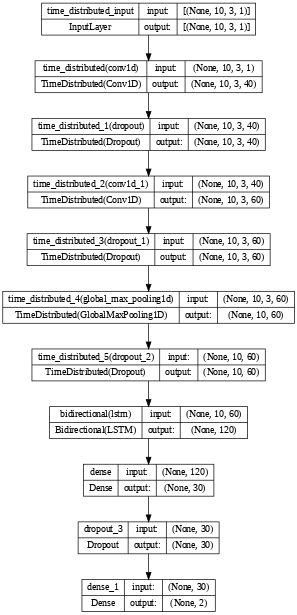

In [ ]:
plot_model(model= model_sensor1, show_shapes= True, dpi=50)

In [ ]:
sensor = "sensor2"
time_callback = TimeHistory()
model_sensor2 = creatModel()
model_save, checkpoint, history_cb, Estop = setCallbacks("sensor2")
history_sensor2 = model_sensor2.fit(X_train_sensor2, y_train_sensor2,
                                    batch_size = 128, epochs = 500,
                                    validation_split = 0.1,
                                    verbose = 1,
                                    callbacks = [time_callback,model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)

Epoch 1/500
191/191 [==============================] - 8s 13ms/step - loss: 0.1464 - accuracy: 0.9484 - val_loss: 0.0646 - val_accuracy: 0.9745 - epoch_time: 7.8295
Epoch 2/500
191/191 [==============================] - 2s 9ms/step - loss: 0.0460 - accuracy: 0.9867 - val_loss: 0.0457 - val_accuracy: 0.9889 - epoch_time: 1.6831
Epoch 3/500
191/191 [==============================] - 3s 13ms/step - loss: 0.0313 - accuracy: 0.9921 - val_loss: 0.0454 - val_accuracy: 0.9889 - epoch_time: 2.3629
Epoch 4/500
191/191 [==============================] - 2s 12ms/step - loss: 0.0237 - accuracy: 0.9938 - val_loss: 0.0310 - val_accuracy: 0.9911 - epoch_time: 2.1132
Epoch 5/500
191/191 [==============================] - 2s 9ms/step - loss: 0.0187 - accuracy: 0.9955 - val_loss: 0.0313 - val_accuracy: 0.9922 - epoch_time: 1.6861
Epoch 6/500
191/191 [==============================] - 2s 10ms/step - loss: 0.0146 - accuracy: 0.9962 - val_loss: 0.0329 - val_accuracy: 0.9911 - epoch_time: 1.8325
Epoch 7/500


In [ ]:
sensor = "sensor3"
time_callback = TimeHistory()
model_sensor3 = creatModel()
model_save, checkpoint, history_cb, Estop = setCallbacks("sensor3")
history_sensor3 = model_sensor3.fit(X_train_sensor3, y_train_sensor3,
                                    batch_size = 128, epochs = 500,
                                    validation_split = 0.1,
                                    verbose = 1,
                                    callbacks = [time_callback,model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)

Epoch 1/500
191/191 [==============================] - 8s 14ms/step - loss: 0.1475 - accuracy: 0.9507 - val_loss: 0.0536 - val_accuracy: 0.9719 - epoch_time: 7.6610
Epoch 2/500
191/191 [==============================] - 3s 13ms/step - loss: 0.0462 - accuracy: 0.9870 - val_loss: 0.0164 - val_accuracy: 0.9963 - epoch_time: 2.3966
Epoch 3/500
191/191 [==============================] - 2s 12ms/step - loss: 0.0272 - accuracy: 0.9932 - val_loss: 0.0041 - val_accuracy: 0.9993 - epoch_time: 2.1689
Epoch 4/500
191/191 [==============================] - 2s 9ms/step - loss: 0.0184 - accuracy: 0.9961 - val_loss: 0.0053 - val_accuracy: 0.9989 - epoch_time: 1.6550
Epoch 5/500
191/191 [==============================] - 2s 9ms/step - loss: 0.0158 - accuracy: 0.9966 - val_loss: 0.0044 - val_accuracy: 0.9993 - epoch_time: 1.6732
Epoch 6/500
191/191 [==============================] - 2s 9ms/step - loss: 0.0135 - accuracy: 0.9965 - val_loss: 0.0011 - val_accuracy: 1.0000 - epoch_time: 1.6960
Epoch 7/500
1

In [ ]:
#plot history of model_sensor1
history_sensor1 = pd.read_csv(model_path+"historyLOG_Instant-10000_sensor1.csv", index_col='epoch')
history_sensor1.reset_index(drop= True, inplace= True)
history_sensor1.head()
print('Average Exe_time for sensor1: {} sec.'.format(round(np.mean(history_sensor1['epoch_time'].values),3)))

Average Exe_time for sensor1: 2.001 sec.


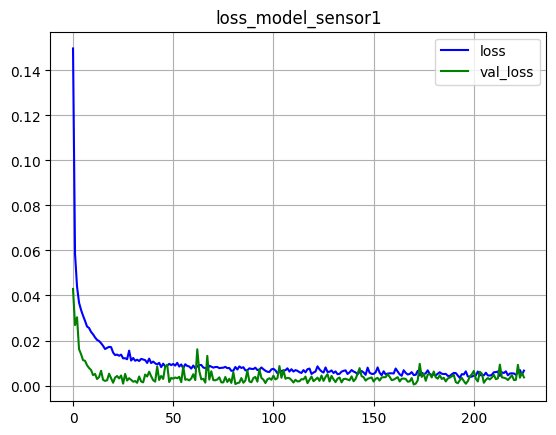

In [ ]:
plt.plot( history_sensor1['loss'], 'b',label = 'loss')
plt.plot( history_sensor1['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor1')
plt.show()

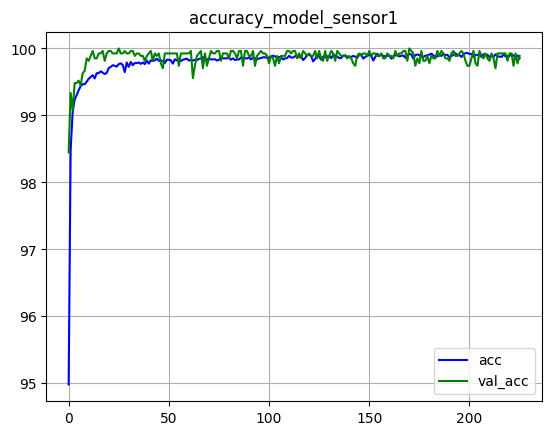

In [ ]:
plt.plot(history_sensor1['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor1['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor1')
plt.show()

In [ ]:
#plot history of model_sensor2
history_sensor2 = pd.read_csv(model_path+"historyLOG_Instant-10000_sensor2.csv", index_col='epoch')
history_sensor2.head()
print('Average Exe_time for sensor2: {} sec.'.format(round(np.mean(history_sensor2['epoch_time'].values),3)))

Average Exe_time for sensor2: 1.951 sec.


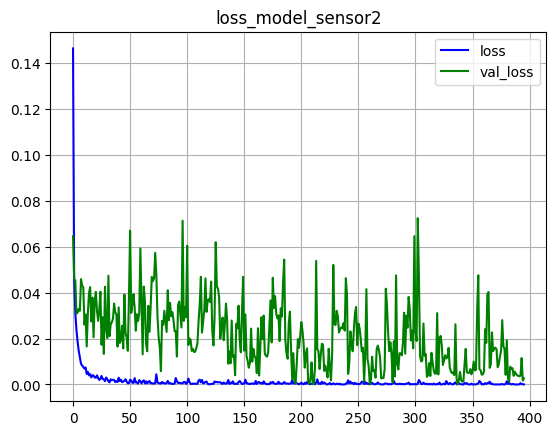

In [ ]:
plt.plot( history_sensor2['loss'], 'b',label = 'loss')
plt.plot( history_sensor2['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor2')
plt.show()

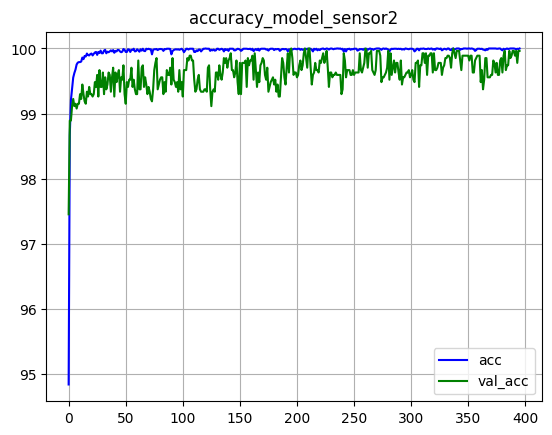

In [ ]:
plt.plot(history_sensor2['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor2['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor2')
plt.show()

In [ ]:
#plot history of model_sensor3
history_sensor3 = pd.read_csv(model_path+"historyLOG_Instant-10000_sensor3.csv", index_col='epoch')
history_sensor3.head()
print('Average Exe_time for sensor3: {} sec.'.format(round(np.mean(history_sensor3['epoch_time'].values),3)))

Average Exe_time for sensor3: 1.951 sec.


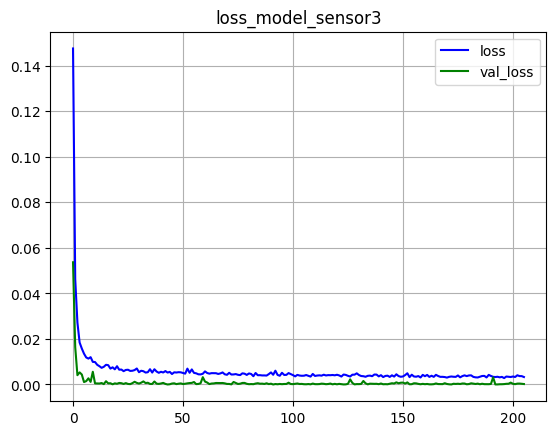

In [ ]:
plt.plot( history_sensor3['loss'], 'b',label = 'loss')
plt.plot( history_sensor3['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor3')
plt.show()

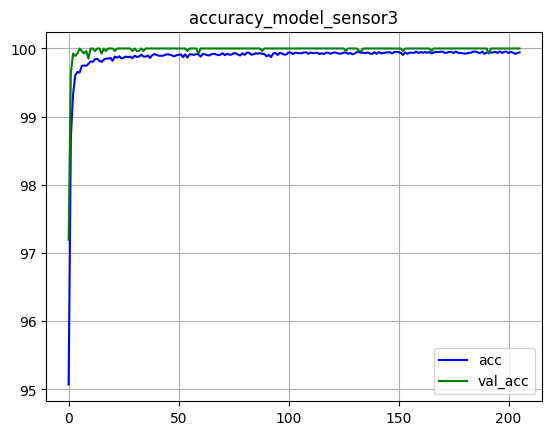

In [ ]:
plt.plot(history_sensor3['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor3['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor3')
plt.show()

In [ ]:
#last model_sensor1 evaluation
test_loss, test_acc = model_sensor1.evaluate( X_test_sensor1, y_test_sensor1, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

85/85 [==============================] - 0s 4ms/step - loss: 2.6071e-04 - accuracy: 1.0000
test accuracy :100.0% 
 test loss :0.000261


In [ ]:
#last model_sensor2 evaluation
test_loss, test_acc = model_sensor2.evaluate( X_test_sensor2, y_test_sensor2, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

85/85 [==============================] - 0s 4ms/step - loss: 0.0682 - accuracy: 0.9963
test accuracy :99.6% 
 test loss :0.0682


In [ ]:
#last model_sensor3 evaluation
test_loss, test_acc = model_sensor3.evaluate( X_test_sensor3, y_test_sensor3, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

85/85 [==============================] - 0s 4ms/step - loss: 6.8797e-05 - accuracy: 1.0000
test accuracy :100.0% 
 test loss :6.88e-05


In [ ]:
y_pred_sensor1 = model_sensor1.predict( X_test_sensor1, verbose= 1)
y_pred_sensor2 = model_sensor2.predict( X_test_sensor2, verbose= 1)
y_pred_sensor3 = model_sensor3.predict( X_test_sensor3, verbose= 1)

85/85 [==============================] - 1s 4ms/step


In [ ]:
y_pred_sensor1[0]

array([9.9974805e-01, 2.4243986e-04], dtype=float32)

In [ ]:
y_pred_sensor1 = [np.argmax(i) for i in y_pred_sensor1]
y_pred_sensor2 = [np.argmax(i) for i in y_pred_sensor2]
y_pred_sensor3 = [np.argmax(i) for i in y_pred_sensor3]

In [ ]:
y_pred_total = []
for i in range(len(y_pred_sensor1)):
  y_pred_total.append( y_pred_sensor1[i] or y_pred_sensor2[i] or y_pred_sensor3[i])

In [ ]:
assert(len(y_pred_total) == len(y_pred_sensor1))

In [ ]:
y_test_sensor1 = [np.argmax(i) for i in y_test_sensor1]
y_test_sensor2 = [np.argmax(i) for i in y_test_sensor2]
y_test_sensor3 = [np.argmax(i) for i in y_test_sensor3]

In [ ]:
y_test_total = []
for i in range(len(y_test_sensor1)):
  y_test_total.append(y_test_sensor1[i] or y_test_sensor2[i] or y_test_sensor3[i])

In [ ]:
print("Sensor 1 performanace:")
recall = recall_score(y_test_sensor1, y_pred_sensor1, average='macro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor1, y_pred_sensor1, average='macro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor1, y_pred_sensor1, average='macro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor1, y_pred_sensor1)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 1 performanace:
recall score : 100.00%

precision score: 100.00%

F1 score: 100.00%

accuracy score: 100.00%



In [ ]:
print("Sensor 2 performanace:")
recall = recall_score(y_test_sensor2, y_pred_sensor2, average='macro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor2, y_pred_sensor2, average='macro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor2, y_pred_sensor2, average='macro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor2, y_pred_sensor2)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 2 performanace:
recall score : 98.68%

precision score: 99.79%

F1 score: 99.22%

accuracy score: 99.63%



In [ ]:
print("Sensor 3 performanace:")
recall = recall_score(y_test_sensor3, y_pred_sensor3, average='macro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor3, y_pred_sensor3, average='macro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor3, y_pred_sensor3, average='macro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor3, y_pred_sensor3)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 3 performanace:
recall score : 100.00%

precision score: 100.00%

F1 score: 100.00%

accuracy score: 100.00%



In [ ]:
print("All Sensors performanace:\n")

recall = recall_score(y_test_total, y_pred_total, average='micro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_total, y_pred_total, average='micro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_total, y_pred_total, average='micro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_total, y_pred_total)
print("accuracy score: {:.2%}\n".format(accuracy))

All Sensors performanace:

recall score : 99.67%

precision score: 99.67%

F1 score: 99.67%

accuracy score: 99.67%



In [ ]:
print("All Sensors performanace:\n")

recall = recall_score(y_test_total, y_pred_total, average='macro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_total, y_pred_total, average='macro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_total, y_pred_total, average='macro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_total, y_pred_total)
print("accuracy score: {:.2%}\n".format(accuracy))

All Sensors performanace:

recall score : 99.56%

precision score: 99.74%

F1 score: 99.64%

accuracy score: 99.67%



In [ ]:
conf = confusion_matrix(y_test_total, y_pred_total, labels=[1,0])
conf_df = pd.DataFrame(conf, columns= [1,0], index= [1,0])
conf_df

,1,0
1,1007,9
0,0,1692
